I want to see if OpSim is really running out of sky to observe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [4]:
outDir = 'PairCheck'
resultsDb = db.ResultsDb(outDir=outDir)
opsdb = db.OpsimDatabase('ops2_1093_sqlite.db')

In [23]:
bundleList = []
summaryStats = [metrics.MedianMetric()]
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
metric = metrics.CountMetric(col='fieldID')
sql=''
displayDict = {'group':'Fields Per Night'}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             summaryMetrics=summaryStats,
                                             displayDict=displayDict))
metric = metrics.CountUniqueMetric(col='fieldID')
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             summaryMetrics=summaryStats,
                                             displayDict=displayDict))

Querying database with no constraint.
Found 2455248 visits
Running:  ['opsim_CountUnique_fieldID_ONED']
Completed metric generation.
Running:  ['opsim_Count_fieldID_ONED']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.


Both binsize and bins have been set; Using binsize 1.000000 only.


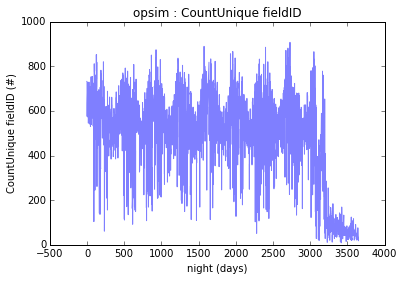

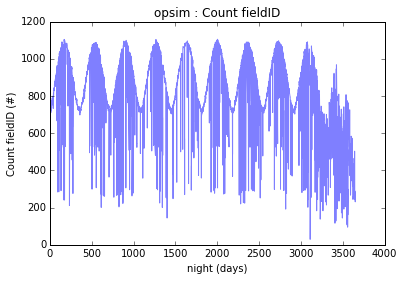

In [24]:
mbd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(mbd, opsdb,
                                        outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

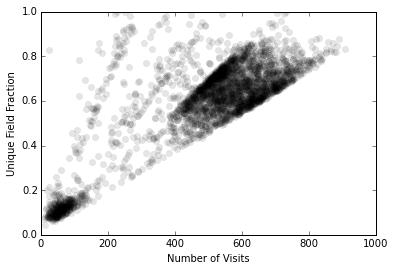

In [42]:
plt.plot(bundleList[1].metricValues.compressed(),
         bundleList[1].metricValues.compressed()/bundleList[0].metricValues.compressed(), 
          'ko', alpha = 0.1)
plt.xlabel('Number of Visits')
plt.ylabel('Unique Field Fraction')

I think this show that during a night it is totally possible to observe 80-100% unique fields.